#### Import modules


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### Set Seed for reproducibility

In [3]:
np.random.seed(420)

#### Loading Data in Traing and Testing Sets

In [4]:
nb_features = 1000

(train_data, train_target), (test_data, test_target) = \
    imdb.load_data(num_words = nb_features)

#### Convert Features into one hot encoder

In [5]:
tokenizer = Tokenizer(num_words = nb_features)
train_data = tokenizer.sequences_to_matrix(train_data, 
                                           mode = 'binary')
test_data = tokenizer.sequences_to_matrix(test_data,
                                          mode ='binary')

#### Create Neural Network

In [6]:
model = Sequential([    
    Dense(units = 16, activation = 'relu', input_shape=(nb_features,)),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

#### Fit Model

In [8]:
history = model.fit(train_data, train_target, epochs = 15, 
                   verbose = 1, batch_size = 1000,
                   validation_data = (test_data, test_target))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 1s 23us/step - loss: 0.2890 - accuracy: 0.8810 - val_loss: 0.3383 - val_accuracy: 0.8566
Epoch 2/15
25000/25000 [==============================] - 1s 23us/step - loss: 0.2824 - accuracy: 0.8854 - val_loss: 0.3404 - val_accuracy: 0.8552
Epoch 3/15
25000/25000 [==============================] - 1s 23us/step - loss: 0.2806 - accuracy: 0.8848 - val_loss: 0.3407 - val_accuracy: 0.8540
Epoch 4/15
25000/25000 [==============================] - 1s 22us/step - loss: 0.2803 - accuracy: 0.8850 - val_loss: 0.3347 - val_accuracy: 0.8589
Epoch 5/15
25000/25000 [==============================] - 1s 24us/step - loss: 0.2748 - accuracy: 0.8881 - val_loss: 0.3428 - val_accuracy: 0.8538
Epoch 6/15
25000/25000 [==============================] - 1s 26us/step - loss: 0.2769 - accuracy: 0.8870 - val_loss: 0.3430 - val_accuracy: 0.8552
Epoch 7/15
25000/25000 [==============================] - 1s 23us/st

#### Predict Values

In [9]:
predicted_target = model.predict(test_data)

#### Visualize Learning Curve

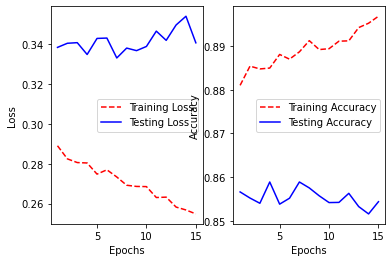

In [12]:
# get loss and accuracy history
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# create epochs count
epoch_count = range(1, len(training_loss) +1)

plt.figure()

# visualize loss history
plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Testing Loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')

# visualize accuracy
plt.subplot(1,2,2)
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()